# Project 4 - Book 3: Predict West Nile Virus

## Recap

Now that we have a better understanding of our data, let's move on to modeling and generate insights we set out to achieve. 

Recommendations on:
1. WHEN
2. WHERE 

the DOPH should conduct vector control to prevent the spread of the WNV


## Notebooks:
- [Data Import and Cleaning](./book1_train_test_data_import_cleaning.ipynb)
- [EDA](./book2_eda.ipynb)
- [Feature Engineering, Modeling and Recommendations](./book3_feature_engineering_modeling.ipynb)


## Contents:
- [Import Libraries](#Import-Libraries)
- [Import Data](#Import-Data)
- [Feature engineering](#Feature-engineering) 
- [Baseline score](#Baseline-score)
- [Features matrix and target vector](#Features-matrix-and-target-vector)
- [Dealing with imbalanced classes](#Dealing-with-imbalanced-classes)
- [Train Test Split](#Train-test-split)
- [Standardization](#Standarization)
- [Modeling with optimized hyperparameters](#Modeling-with-optimized-hyperparameters)
- [Best Model](#Best-model)
- [Cost Benefit Analysis](#Cost-Benefit-Analysis)
- [Recommendations](#Recommendations)
- [Conclusion](#Conclusion)
- [Kaggle Submission](#Kaggle-Submission)

## Import Libraries

In [1]:
#import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.metrics import roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

%matplotlib inline
pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Import Data

In [2]:
#import cleaned data 
train = pd.read_csv('./assets/data_clean/train_clean.csv')
test = pd.read_csv('./assets/data_clean/test_clean.csv')

display(train.head(2))
display(train.shape)
display(train.info())

display(test.head(2))
display(test.shape)
display(test.info())

,date,lat,lon,trap,station,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,species_UNSPECIFIED CULEX,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,depth,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,ra,fg,gr,br,tsra,sn,dz,fg+,sq,fu,hz,mifg,vcfg,bcfg,vcts,ts,num_mos,wnv_pres
0,2007-05-29,41.688324,-87.676709,86,2,0,0,0,1,0,0,0,0,88,65,77,10,59,66,0,12,421,1917,0,0.0,0.0,29.44,30.09,5.8,16,7.4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0
1,2007-05-29,41.688324,-87.676709,86,2,0,0,1,0,0,0,0,0,88,65,77,10,59,66,0,12,421,1917,0,0.0,0.0,29.44,30.09,5.8,16,7.4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0


(8475, 49)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   date                            8475 non-null   object 
 1   lat                             8475 non-null   float64
 2   lon                             8475 non-null   float64
 3   trap                            8475 non-null   int64  
 4   station                         8475 non-null   int64  
 5   species_CULEX ERRATICUS         8475 non-null   int64  
 6   species_CULEX PIPIENS           8475 non-null   int64  
 7   species_CULEX PIPIENS/RESTUANS  8475 non-null   int64  
 8   species_CULEX RESTUANS          8475 non-null   int64  
 9   species_CULEX SALINARIUS        8475 non-null   int64  
 10  species_CULEX TARSALIS          8475 non-null   int64  
 11  species_CULEX TERRITANS         8475 non-null   int64  
 12  species_UNSPECIFIED CULEX       84

None

,date,lat,lon,num_mos,trap,wnv_pres,station,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,species_UNSPECIFIED CULEX,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,depth,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed,ra,fg,gr,br,tsra,sn,dz,fg+,sq,fu,hz,mifg,vcfg,bcfg,vcts,ts
0,2008-06-11,41.95469,-87.800991,NaN,2,NaN,1,0,0,1,0,0,0,0,0,86,61,74,7,56,64,0,9,416,1926,0,0.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2008-06-11,41.95469,-87.800991,NaN,2,NaN,1,0,0,0,1,0,0,0,0,86,61,74,7,56,64,0,9,416,1926,0,0.0,0.0,29.28,29.99,8.9,18,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(116293, 49)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 49 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   date                            116293 non-null  object 
 1   lat                             116293 non-null  float64
 2   lon                             116293 non-null  float64
 3   num_mos                         0 non-null       float64
 4   trap                            116293 non-null  int64  
 5   wnv_pres                        0 non-null       float64
 6   station                         116293 non-null  int64  
 7   species_CULEX ERRATICUS         116293 non-null  int64  
 8   species_CULEX PIPIENS           116293 non-null  int64  
 9   species_CULEX PIPIENS/RESTUANS  116293 non-null  int64  
 10  species_CULEX RESTUANS          116293 non-null  int64  
 11  species_CULEX SALINARIUS        116293 non-null  int64  
 12  species_CULEX TA

None

In [3]:
#convert date to datetime format 
train['date'] = pd.to_datetime(train['date'])
display(train['date'].dtype)

#do the same for test
test['date'] = pd.to_datetime(test['date'])
display(test['date'].dtype)

dtype('<M8[ns]')

dtype('<M8[ns]')

---
## Feature engineering

- Remove collinear features from train data 
- Remove features with lowest corr to ```wnv_pres``` 
- Engineering new feature

### Removing collinear features by visualising heatmap
- tmax, tmin, tavg correlated - drop tmin and tmax
- sealevel and stnpressure correlated - drop sealevel 
- depart and temperatures correlated - drop depart
- wetbulb and temperatures correlated - drop wetbulb
- heat and temperatures correlated - drop heat 
- cool and temperatures negatively correlated - drop cool
- sunrise and sunset negatively correlated - create daylight hours col, drop sunset
- avgspeed and resultspeed correlated - drop avgspeed 

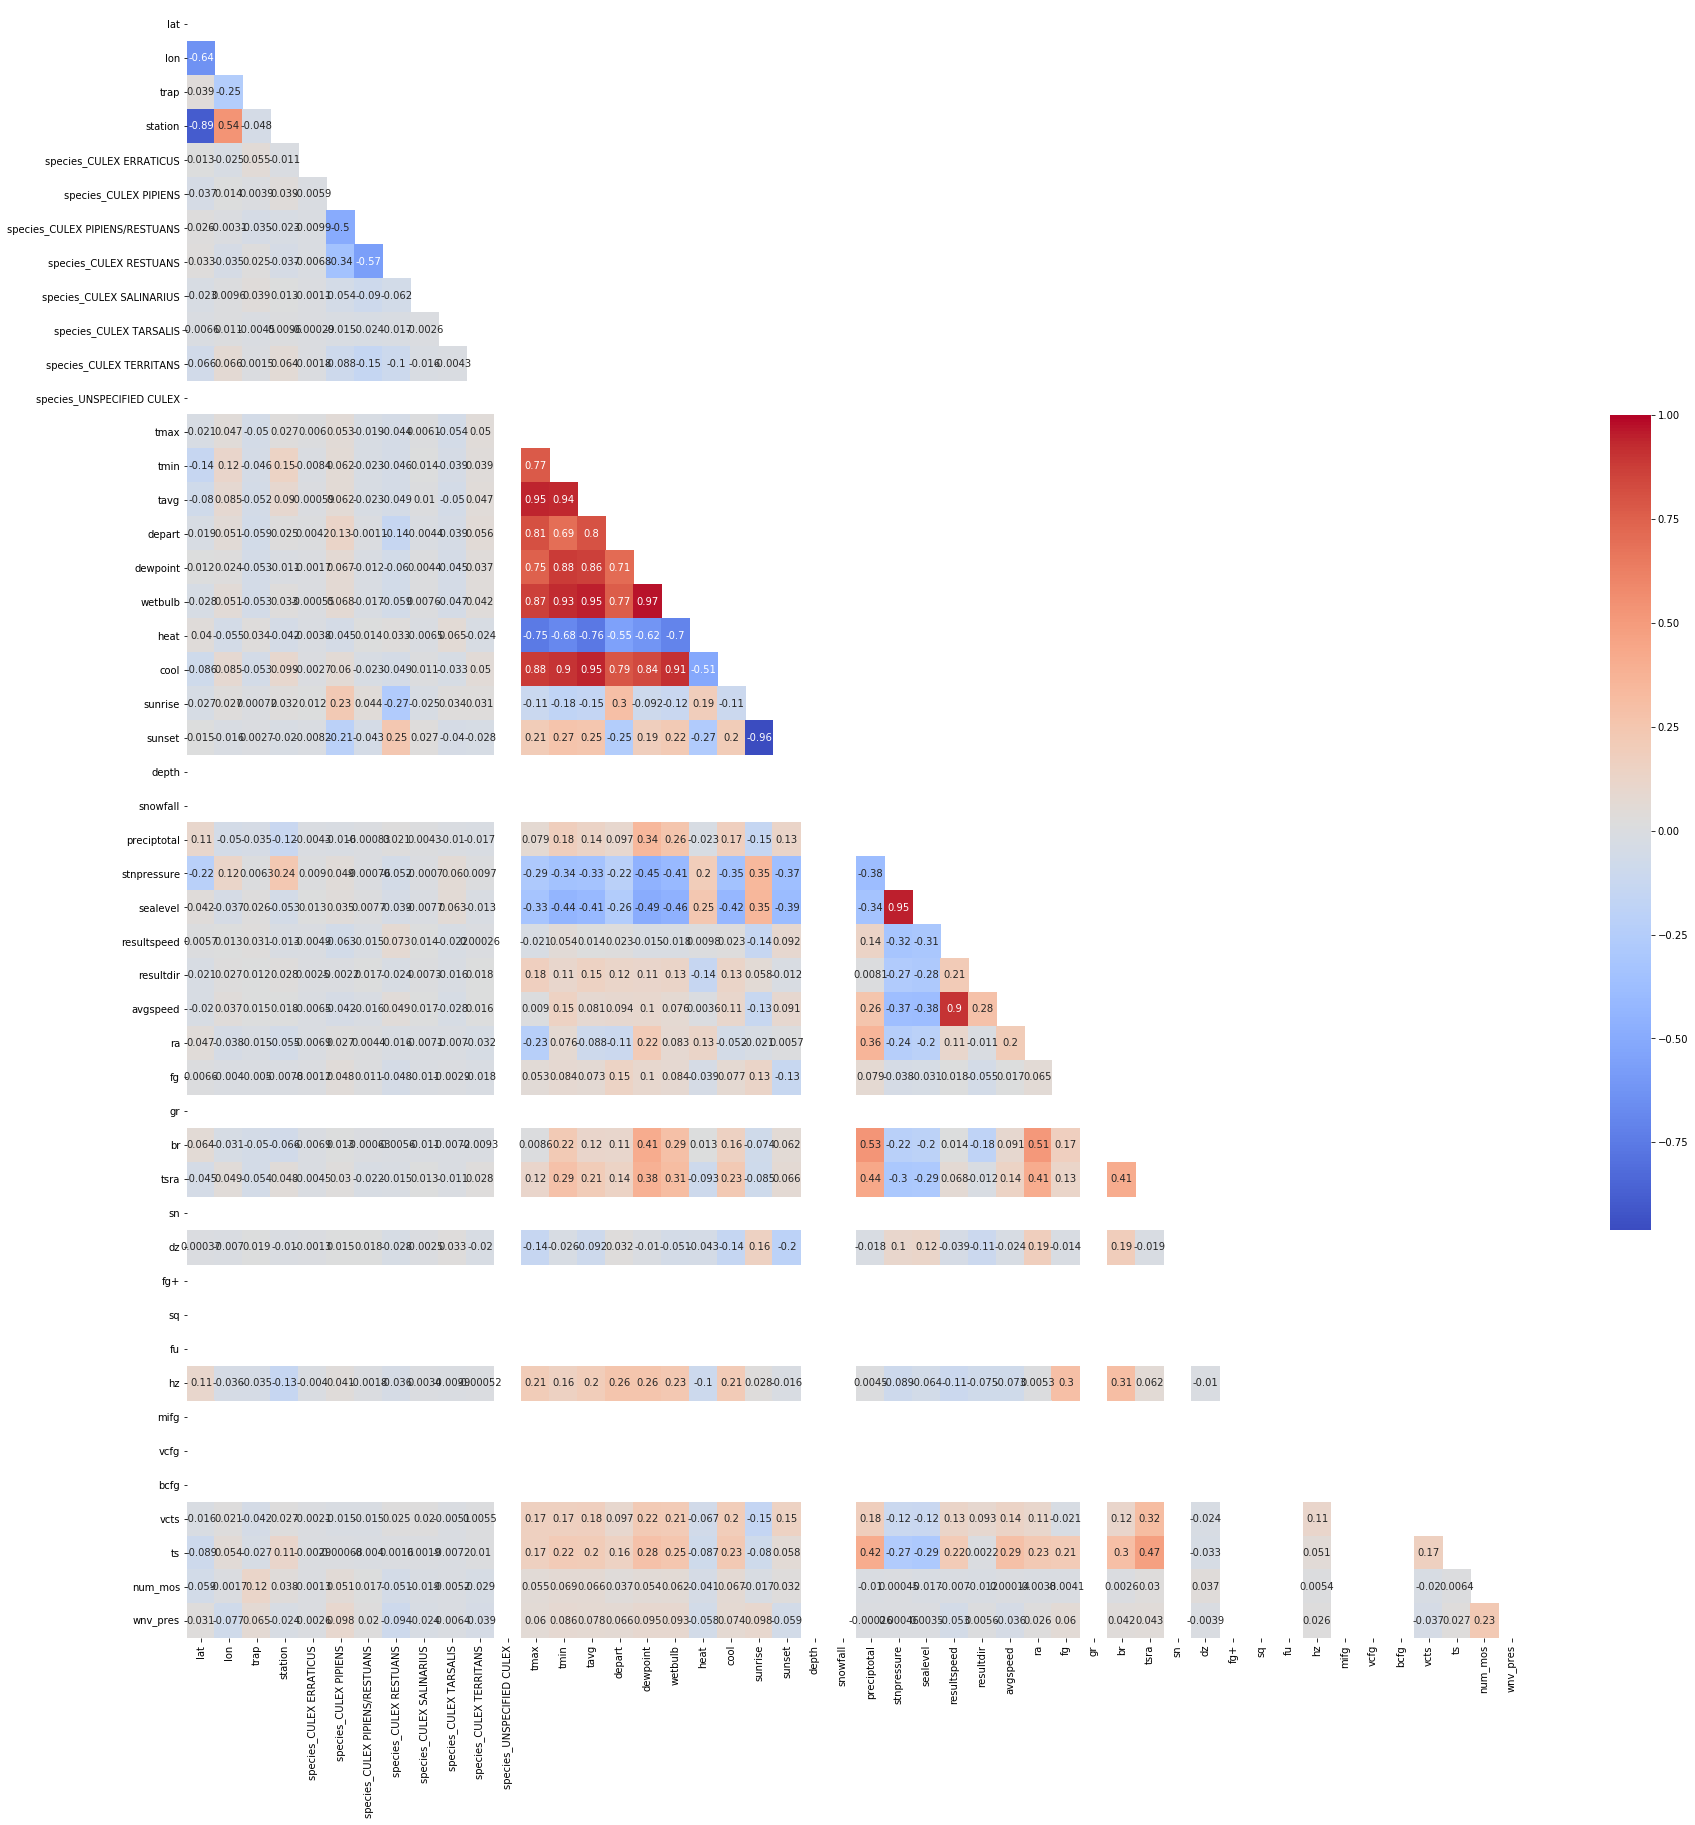

In [4]:
plt.figure(figsize=(30,30))
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
sns.heatmap(train.corr(), mask = mask, annot=True, cmap = "coolwarm", cbar_kws={"shrink": .5});

In [5]:
#creating daylight hours col 
train['daylight_hours'] = (train['sunset'] - train['sunrise'])/100

In [6]:
#creating temperature range col 
train['t_range'] = train['tmax'] - train['tmin']

In [7]:
#dropping tmin, tmax, sealevel, depart, wetbulb, heat, cool, sunset, avgspeed
train.drop(columns = ['tmin', 'tmax', 'sealevel', 'depart', 
                      'wetbulb', 'heat', 'cool', 'sunset', 'avgspeed'], inplace=True)

In [8]:
display(train.shape)
display(train.head(2))

(8475, 42)

,date,lat,lon,trap,station,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,species_UNSPECIFIED CULEX,tavg,dewpoint,sunrise,depth,snowfall,preciptotal,stnpressure,resultspeed,resultdir,ra,fg,gr,br,tsra,sn,dz,fg+,sq,fu,hz,mifg,vcfg,bcfg,vcts,ts,num_mos,wnv_pres,daylight_hours,t_range
0,2007-05-29,41.688324,-87.676709,86,2,0,0,0,1,0,0,0,0,77,59,421,0,0.0,0.0,29.44,5.8,16,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,14.96,23
1,2007-05-29,41.688324,-87.676709,86,2,0,0,1,0,0,0,0,0,77,59,421,0,0.0,0.0,29.44,5.8,16,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1.0,0.0,14.96,23


### Dropping columns with all 0 values in both train and test 
- They are: depth, snowfall, fu, sq, vcfg, gr, sn, mifg

In [9]:
#investigating which columns which have all 0 values for train and test 
(train == 0).sum()

date                                 0
lat                                  0
lon                                  0
trap                                 0
station                              0
species_CULEX ERRATICUS           8474
species_CULEX PIPIENS             6525
species_CULEX PIPIENS/RESTUANS    4649
species_CULEX RESTUANS            6082
species_CULEX SALINARIUS          8392
species_CULEX TARSALIS            8469
species_CULEX TERRITANS           8259
species_UNSPECIFIED CULEX         8475
tavg                                 0
dewpoint                             0
sunrise                              0
depth                             8475
snowfall                          8475
preciptotal                       5457
stnpressure                          0
resultspeed                          0
resultdir                            0
ra                                6059
fg                                8373
gr                                8475
br                       

In [10]:
(test==0).sum()

date                                   0
lat                                    0
lon                                    0
num_mos                                0
trap                                   0
wnv_pres                               0
station                                0
species_CULEX ERRATICUS           101948
species_CULEX PIPIENS             101772
species_CULEX PIPIENS/RESTUANS    100934
species_CULEX RESTUANS            101623
species_CULEX SALINARIUS          101938
species_CULEX TARSALIS            101946
species_CULEX TERRITANS           101942
species_UNSPECIFIED CULEX         101948
tmax                                   0
tmin                                   0
tavg                                   0
depart                              7319
dewpoint                               0
wetbulb                                0
heat                              100359
cool                               17237
sunrise                                0
sunset          

In [11]:
#dropping depth, snowfall, fu, sq, vcfg, gr, sn, mifg
train.drop(columns = ['depth', 'snowfall', 'fu', 'sq', 'vcfg', 'gr', 'sn', 'mifg'], inplace=True)

In [12]:
display(train.shape)
display(train.head(2))

(8475, 34)

,date,lat,lon,trap,station,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,species_UNSPECIFIED CULEX,tavg,dewpoint,sunrise,preciptotal,stnpressure,resultspeed,resultdir,ra,fg,br,tsra,dz,fg+,hz,bcfg,vcts,ts,num_mos,wnv_pres,daylight_hours,t_range
0,2007-05-29,41.688324,-87.676709,86,2,0,0,0,1,0,0,0,0,77,59,421,0.0,29.44,5.8,16,0,0,1,0,0,0,1,0,0,0,1.0,0.0,14.96,23
1,2007-05-29,41.688324,-87.676709,86,2,0,0,1,0,0,0,0,0,77,59,421,0.0,29.44,5.8,16,0,0,1,0,0,0,1,0,0,0,1.0,0.0,14.96,23


### Create ```year```, ```month```, ```week```, ```day``` column (in integer format), drop ```date``` (datetime format)

In [13]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['week'] = train['date'].dt.week
train['day'] = train['date'].dt.day
train.drop(columns = ['date'], inplace=True)

In [14]:
display(train.shape)
display(train.head(2))

(8475, 37)

,lat,lon,trap,station,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,species_UNSPECIFIED CULEX,tavg,dewpoint,sunrise,preciptotal,stnpressure,resultspeed,resultdir,ra,fg,br,tsra,dz,fg+,hz,bcfg,vcts,ts,num_mos,wnv_pres,daylight_hours,t_range,year,month,week,day
0,41.688324,-87.676709,86,2,0,0,0,1,0,0,0,0,77,59,421,0.0,29.44,5.8,16,0,0,1,0,0,0,1,0,0,0,1.0,0.0,14.96,23,2007,5,22,29
1,41.688324,-87.676709,86,2,0,0,1,0,0,0,0,0,77,59,421,0.0,29.44,5.8,16,0,0,1,0,0,0,1,0,0,0,1.0,0.0,14.96,23,2007,5,22,29


### Dropping columns with low correlation to ```wnv_pres```
- drop all remaining codesum columns ('ts', 'fg', 'tsra', 'dz', 'ra', 'br', 'vcts', 'hz', 'bcfg', 'fg+') as the correlation with ```wnv_pres``` is low and upon further investigation, they provide more details about rainfall - which is already captured in preciptotal
- dropping species_UNSPECIFIED CULEX as correlation with ```wnv_pres``` is NaN. Earlier EDA also showed that it was the CULEX PIPIENS and CULEX RESTUANS

In [15]:
train.corrwith(train['wnv_pres']).abs().sort_values(ascending=False)

wnv_pres                          1.000000
num_mos                           0.233532
week                              0.100561
month                             0.097948
species_CULEX PIPIENS             0.097868
sunrise                           0.097634
dewpoint                          0.095384
species_CULEX RESTUANS            0.094047
tavg                              0.077506
lon                               0.076732
daylight_hours                    0.075875
trap                              0.065381
fg                                0.059884
resultspeed                       0.053174
year                              0.043038
tsra                              0.042503
br                                0.042038
species_CULEX TERRITANS           0.038609
vcts                              0.037253
lat                               0.030862
t_range                           0.030258
ts                                0.027395
hz                                0.026412
ra         

In [16]:
train.drop(columns = ['ts', 'fg', 'tsra', 'dz', 'ra', 'br', 'vcts', 'hz', 'bcfg', 'fg+', 
                      'species_UNSPECIFIED CULEX'], inplace=True)
display(train.shape)
display(train.head(2))

(8475, 26)

,lat,lon,trap,station,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,tavg,dewpoint,sunrise,preciptotal,stnpressure,resultspeed,resultdir,num_mos,wnv_pres,daylight_hours,t_range,year,month,week,day
0,41.688324,-87.676709,86,2,0,0,0,1,0,0,0,77,59,421,0.0,29.44,5.8,16,1.0,0.0,14.96,23,2007,5,22,29
1,41.688324,-87.676709,86,2,0,0,1,0,0,0,0,77,59,421,0.0,29.44,5.8,16,1.0,0.0,14.96,23,2007,5,22,29


### Drop ```num_mos``` as it is not present in test data 

In [17]:
train.drop(columns = ['num_mos'], inplace=True)
display(train.shape)
display(train.head(2))

(8475, 25)

,lat,lon,trap,station,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,tavg,dewpoint,sunrise,preciptotal,stnpressure,resultspeed,resultdir,wnv_pres,daylight_hours,t_range,year,month,week,day
0,41.688324,-87.676709,86,2,0,0,0,1,0,0,0,77,59,421,0.0,29.44,5.8,16,0.0,14.96,23,2007,5,22,29
1,41.688324,-87.676709,86,2,0,0,1,0,0,0,0,77,59,421,0.0,29.44,5.8,16,0.0,14.96,23,2007,5,22,29


### Engineering ```rel_humidity``` column 

Research has shown that mosquitos thrive in humid areas. A relative humidity column will be calculated by applying a formula using ```t_avg``` and ```dewpoint``` values

In [18]:
#credits: Elaine Z

tavg_c = ((train['tavg'] - 32) * 5 / 9)
dewpoint_c = ((train['dewpoint'] - 32) * 5 / 9)
vap_press_sat = np.exp((17.625 * tavg_c) / (tavg_c + 243.04))
vap_press_act = np.exp((17.625 * dewpoint_c) / (dewpoint_c + 243.04))
rel_humidity = (vap_press_act / vap_press_sat) * 100

train['rel_humidity'] = rel_humidity

### Adding time lag element 

Adding time lag element to remaining weather features to see the effect of weather 7 and 14 days ago on ```wnv_pres```

Our research has found that mosquito larvae take 10 to 14 days to develop to an adult mosquito. We would like to investigate the impact of previous weather data (7, 10 and 14 days ago) on ```wnv_pres```

In [19]:
weather_lag = ['tavg', 't_range', 'daylight_hours', 'sunrise', 'dewpoint','preciptotal', 'stnpressure', 
               'resultspeed', 'resultdir', 'rel_humidity']
lag_features = train[weather_lag]
lags = (7, 10, 14)

In [20]:
train = train.assign(**{f'{col}_lag_{n}': lag_features[col].shift(n) for n in lags for col in lag_features})

In [21]:
display(train.head(8))
display(train.tail(5))

,lat,lon,trap,station,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,tavg,dewpoint,sunrise,preciptotal,stnpressure,resultspeed,resultdir,wnv_pres,daylight_hours,t_range,year,month,week,day,rel_humidity,tavg_lag_7,t_range_lag_7,daylight_hours_lag_7,sunrise_lag_7,dewpoint_lag_7,preciptotal_lag_7,stnpressure_lag_7,resultspeed_lag_7,resultdir_lag_7,rel_humidity_lag_7,tavg_lag_10,t_range_lag_10,daylight_hours_lag_10,sunrise_lag_10,dewpoint_lag_10,preciptotal_lag_10,stnpressure_lag_10,resultspeed_lag_10,resultdir_lag_10,rel_humidity_lag_10,tavg_lag_14,t_range_lag_14,daylight_hours_lag_14,sunrise_lag_14,dewpoint_lag_14,preciptotal_lag_14,stnpressure_lag_14,resultspeed_lag_14,resultdir_lag_14,rel_humidity_lag_14
0,41.688324,-87.676709,86,2,0,0,0,1,0,0,0,77,59,421,0.0,29.44,5.8,16,0.0,14.96,23,2007,5,22,29,53.830642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41.688324,-87.676709,86,2,0,0,1,0,0,0,0,77,59,421,0.0,29.44,5.8,16,0.0,14.96,23,2007,5,22,29,53.830642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,41.720848,-87.666014,94,2,0,0,0,1,0,0,0,77,59,421,0.0,29.44,5.8,16,0.0,14.96,23,2007,5,22,29,53.830642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,41.731922,-87.677512,96,2,0,0,0,1,0,0,0,77,59,421,0.0,29.44,5.8,16,0.0,14.96,23,2007,5,22,29,53.830642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,41.731922,-87.677512,96,2,0,1,0,0,0,0,0,77,59,421,0.0,29.44,5.8,16,0.0,14.96,23,2007,5,22,29,53.830642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,41.732984,-87.649642,159,2,0,0,0,1,0,0,0,77,59,421,0.0,29.44,5.8,16,0.0,14.96,23,2007,5,22,29,53.830642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,41.862292,-87.648860,91,2,0,0,0,1,0,0,0,77,59,421,0.0,29.44,5.8,16,0.0,14.96,23,2007,5,22,29,53.830642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,41.867108,-87.654224,48,1,0,0,0,1,0,0,0,74,58,421,0.0,29.39,5.8,18,0.0,14.96,28,2007,5,22,29,57.398449,77.0,23.0,14.96,421.0,59.0,0.0,29.44,5.8,16.0,53.830642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,lat,lon,trap,station,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,tavg,dewpoint,sunrise,preciptotal,stnpressure,resultspeed,resultdir,wnv_pres,daylight_hours,t_range,year,month,week,day,rel_humidity,tavg_lag_7,t_range_lag_7,daylight_hours_lag_7,sunrise_lag_7,dewpoint_lag_7,preciptotal_lag_7,stnpressure_lag_7,resultspeed_lag_7,resultdir_lag_7,rel_humidity_lag_7,tavg_lag_10,t_range_lag_10,daylight_hours_lag_10,sunrise_lag_10,dewpoint_lag_10,preciptotal_lag_10,stnpressure_lag_10,resultspeed_lag_10,resultdir_lag_10,rel_humidity_lag_10,tavg_lag_14,t_range_lag_14,daylight_hours_lag_14,sunrise_lag_14,dewpoint_lag_14,preciptotal_lag_14,stnpressure_lag_14,resultspeed_lag_14,resultdir_lag_14,rel_humidity_lag_14
8470,41.987280,-87.666066,231,1,0,0,1,0,0,0,0,63,52,543,0.0,29.34,3.8,8,0.0,11.99,25,2013,9,39,26,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313
8471,41.991429,-87.747113,12,1,0,0,1,0,0,0,0,63,52,543,0.0,29.34,3.8,8,0.0,11.99,25,2013,9,39,26,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313
8472,41.992478,-87.862995,9,1,0,0,0,1,0,0,0,63,52,543,0.0,29.34,3.8,8,0.0,11.99,25,2013,9,39,26,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313
8473,42.008314,-87.777921,8,1,0,0,1,0,0,0,0,63,52,543,0.0,29.34,3.8,8,0.0,11.99,25,2013,9,39,26,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313
8474,42.009876,-87.807277,233,1,0,0,1,0,0,0,0,63,52,543,0.0,29.34,3.8,8,0.0,11.99,25,2013,9,39,26,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313,63.0,25.0,11.99,543.0,52.0,0.0,29.34,3.8,8.0,67.317313


In [22]:
#inpute 0 value to NaNs which surfaced in time lag columns 

train.fillna(0, inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lat                             8475 non-null   float64
 1   lon                             8475 non-null   float64
 2   trap                            8475 non-null   int64  
 3   station                         8475 non-null   int64  
 4   species_CULEX ERRATICUS         8475 non-null   int64  
 5   species_CULEX PIPIENS           8475 non-null   int64  
 6   species_CULEX PIPIENS/RESTUANS  8475 non-null   int64  
 7   species_CULEX RESTUANS          8475 non-null   int64  
 8   species_CULEX SALINARIUS        8475 non-null   int64  
 9   species_CULEX TARSALIS          8475 non-null   int64  
 10  species_CULEX TERRITANS         8475 non-null   int64  
 11  tavg                            8475 non-null   int64  
 12  dewpoint                        84

### Repeat feature engineering for test data

In [24]:
#drop num_mos and wnv_pres as they were inserted during EDA 
test.drop(columns = ['num_mos', 'wnv_pres'], inplace=True)

#convert date to datetime 
test['date'] = pd.to_datetime(test['date'])

#create year, month, day (int) cols, drop date col
test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['week'] = test['date'].dt.week
test['day'] = test['date'].dt.day
test.drop(columns = ['date'], inplace=True)

#creating daylight hours col 
test['daylight_hours'] = (test['sunset'] - test['sunrise'])/100

#creating temp range col 
test['t_range'] = test['tmax'] - test['tmin']

#dropping tmin, tmax, sealevel, depart, wetbulb, heat, cool, sunset, avgspeed due to collinearity
test.drop(columns = ['tmin', 'tmax', 'sealevel', 'depart',  
                      'wetbulb', 'heat', 'cool', 'sunset', 'avgspeed'], inplace=True)

#dropping depth, snowfall, fu, sq, vcfg, gr, sn, mifg due to all 0 values
test.drop(columns = ['depth', 'snowfall', 'fu', 'sq', 'vcfg', 'gr', 'sn', 'mifg'], inplace=True)

#dropping remaining codesum columns due to negligible corr with wnv_pres 
test.drop(columns = ['ts', 'fg', 'tsra', 'dz', 'ra', 'br', 'vcts', 'hz', 'bcfg', 'fg+', 
                      'species_UNSPECIFIED CULEX'], inplace=True)

#add rel_humidity col
tavg_c = ((test['tavg'] - 32) * 5 / 9)
dewpoint_c = ((test['dewpoint'] - 32) * 5 / 9)
vap_press_sat = np.exp((17.625 * tavg_c) / (tavg_c + 243.04))
vap_press_act = np.exp((17.625 * dewpoint_c) / (dewpoint_c + 243.04))
rel_humidity = (vap_press_act / vap_press_sat) * 100
test['rel_humidity'] = rel_humidity

#adding time lag of 7, 10 and 14 days to weather data 
test = test.assign(**{f'{col}_lag_{n}': lag_features[col].shift(n) for n in lags for col in lag_features})

#inpute 0 value to NaN 
test.fillna(0, inplace=True)

#reordering test columns to be same as train columns
test = test[[col for col in train.columns if col != 'wnv_pres']]

display(test.shape)
display(test.head(2))
display(test.info())

(116293, 55)

,lat,lon,trap,station,species_CULEX ERRATICUS,species_CULEX PIPIENS,species_CULEX PIPIENS/RESTUANS,species_CULEX RESTUANS,species_CULEX SALINARIUS,species_CULEX TARSALIS,species_CULEX TERRITANS,tavg,dewpoint,sunrise,preciptotal,stnpressure,resultspeed,resultdir,daylight_hours,t_range,year,month,week,day,rel_humidity,tavg_lag_7,t_range_lag_7,daylight_hours_lag_7,sunrise_lag_7,dewpoint_lag_7,preciptotal_lag_7,stnpressure_lag_7,resultspeed_lag_7,resultdir_lag_7,rel_humidity_lag_7,tavg_lag_10,t_range_lag_10,daylight_hours_lag_10,sunrise_lag_10,dewpoint_lag_10,preciptotal_lag_10,stnpressure_lag_10,resultspeed_lag_10,resultdir_lag_10,rel_humidity_lag_10,tavg_lag_14,t_range_lag_14,daylight_hours_lag_14,sunrise_lag_14,dewpoint_lag_14,preciptotal_lag_14,stnpressure_lag_14,resultspeed_lag_14,resultdir_lag_14,rel_humidity_lag_14
0,41.95469,-87.800991,2,1,0,0,1,0,0,0,0,74,56,416,0.0,29.28,8.9,18,15.1,25,2008,6,24,11,53.405643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41.95469,-87.800991,2,1,0,0,0,1,0,0,0,74,56,416,0.0,29.28,8.9,18,15.1,25,2008,6,24,11,53.405643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lat                             116293 non-null  float64
 1   lon                             116293 non-null  float64
 2   trap                            116293 non-null  int64  
 3   station                         116293 non-null  int64  
 4   species_CULEX ERRATICUS         116293 non-null  int64  
 5   species_CULEX PIPIENS           116293 non-null  int64  
 6   species_CULEX PIPIENS/RESTUANS  116293 non-null  int64  
 7   species_CULEX RESTUANS          116293 non-null  int64  
 8   species_CULEX SALINARIUS        116293 non-null  int64  
 9   species_CULEX TARSALIS          116293 non-null  int64  
 10  species_CULEX TERRITANS         116293 non-null  int64  
 11  tavg                            116293 non-null  int64  
 12  dewpoint        

None

---

## Baseline score

The baseline score of 0.946 is the accuracy score achieved if all the predictions were ```wnv_pres``` = 0. This is because the train data is very imbalanced with ```wnv_pres``` = 0 comprising 94.6% of ```wnv_pres``` data. 

Will use SMOTE to balance the classes.

In [25]:
train['wnv_pres'].value_counts(normalize=True)

0.0    0.946077
1.0    0.053923
Name: wnv_pres, dtype: float64

---

## Features matrix and target vector

In [26]:
X = train[[col for col in train.columns if col != 'wnv_pres']]
y = train['wnv_pres']

---
## Train test split

Split train data to train and test set 

Use smote to generate synthetic data for the minority class: ```wnv_pres``` = 1

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

In [28]:
X_train_columns = X_train.columns

---
## Standard scaler

In [29]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

---

## Dealing with imbalanced classes

In [30]:
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(X_train_ss, y_train)

---

## Modeling with optimized hyperparameters

In [31]:
# Initialize dictionaries for models
model_dict = {'lr': LogisticRegression(),
       'knn': KNeighborsClassifier(),
       'rf' : RandomForestClassifier(),
       'gbc' : GradientBoostingClassifier(),
       'abc' : AdaBoostClassifier(),
             'xgc': XGBClassifier()}

# Initialize functions for pipeline
def pipeline(model):
    pipe_list = (model,model_dict[model])
    return Pipeline([pipe_list])

# Initialize functions for parameters
def params(model):
    if model == 'lr':
        return {'lr__solver' : ['liblinear'],
                'lr__penalty': ['l1', 'l2'],
                'lr__C': np.logspace(-5, 1, 50)
                }
    elif model == 'knn':
        return {'knn__n_neighbors' : [2,3,4,5,6,7,8,9,10]
                }
    elif model == 'rf':
        return {
                'rf__n_estimators': [100, 150, 200],
                'rf__max_depth': [3, 5, 7, 10],
                'rf__min_samples_leaf' : [1,2,3],
                'rf__n_estimators': [100, 200, 500]
                }
    elif model == 'gbc':
        return {
                'gbc__learning_rate': [0.1, 0.2, 0.5, 0.7],
                'gbc__max_depth': [3, 4, 5, 7],
                'gbc__n_estimators': [100, 200, 500]
                }
    elif model == 'abc':
        return {
                'abc__learning_rate': [0.2, 0.5, 0.7, 0.9],
                'abc__n_estimators': [100, 200, 500]
                }
    
    elif model == 'xgc':
        return {
                'xgc__learning_rate' : [0.1, 0.5],
                'xgc__max_depth' : [3, 5, 7], 
                'xgc__n_estimators' : [100, 150, 200],
                'xgc__reg_alpha' : [0, 1],
                'xgc__gamma' : [0.1, 1]
                }

#Gridsearch
def grid_search(model,n_jobs=-1):
    pipe_params = params(model)
    pipe = pipeline(model)
    gs = GridSearchCV(pipe,param_grid=pipe_params,cv=5, n_jobs = -1, verbose=1)
    gs.fit(X_train_sm,y_train_sm)

#Print model performance metrics
    print(f'{model} model performance')
    print(f'Best params: {gs.best_params_}')
    print(f'Train accuracy score: {round(gs.best_score_,2)}')
    print(f'Test accuracy score: {round(gs.score(X_test_ss,y_test),2)}')
    
    pred_proba = [i[1] for i in gs.predict_proba(X_test_ss)]
    
    print(f'ROC AUC score: {roc_auc_score(y_test, pred_proba)}')
    
    tn, fp, fn, tp = confusion_matrix(y_test, gs.best_estimator_.predict(X_test_ss)).ravel()
    
    print(f'Test sensitivity score: {tp/(tp+fn)}')
    print(f'Test specificity score: {tn/(tn+fp)}')
    print(f'Test precision score: {tp/(tp+fp)}')                                  
    print('')
    print(f'Train f1-score: {f1_score(gs.best_estimator_.predict(X_train_sm), y_train_sm)}')
    print(f'Test f1-score: {f1_score(gs.best_estimator_.predict(X_test_ss), y_test)}')
    print ('')
    
    print('Confusion matrix:')
    cm = pd.DataFrame(confusion_matrix(y_test, gs.best_estimator_.predict(X_test_ss)),  
                      index = ['Actual WNV absent','Actual WNV present'],
                    columns = ['Predicted WNV absent', 'Predicted WNV present'])
    print(cm)
    print('')
    print("TN: %s" % tn)
    print("FP: %s" % fp)
    print("FN: %s" % fn)
    print("TP: %s" % tp)

In [32]:
break
#break placed here intentionally - GS takes a long time to run 

SyntaxError: 'break' outside loop (<ipython-input-32-d207495e0051>, line 4)

In [ ]:
grid_search('xgc')

In [ ]:
grid_search('gbc')

In [ ]:
grid_search('abc')

In [ ]:
grid_search('lr')

In [ ]:
grid_search('rf')

In [ ]:
grid_search('knn')

---

## Best model

XGBoostClassifier model as it has the lowest number of false positives (need to take this metric into consideration so as to avoid wasting money spraying areas where WNV is predicted to be present, but is not). 

ROC AUC score is also the highest

In [33]:
xgc = XGBClassifier(gamma = 0.1, learning_rate = 0.1, max_depth = 7, n_estimators = 200, reg_alpha = 1)
xgc.fit(X_train_sm, y_train_sm) 

pred = xgc.predict(X_test_ss)
pred_proba = [i[1] for i in xgc.predict_proba(X_test_ss)]

In [34]:
#sanity check that pred contains 1s and 0s 
np.unique(pred)

array([0., 1.])

### ROC curve

The ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. An AUC score of 0.83 shows that the model is well capable of distingushing between ```wnv_pres``` = 0 or = 1

In [35]:
pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})
pred_df.head(20)

,true_values,pred_probs
5601,0.0,0.003026
796,0.0,0.002131
1933,0.0,0.008964
3580,0.0,0.002042
5990,0.0,0.025396
3903,0.0,0.009329
7396,0.0,0.013859
5348,0.0,0.001480
1298,0.0,0.002889
3470,0.0,0.000444


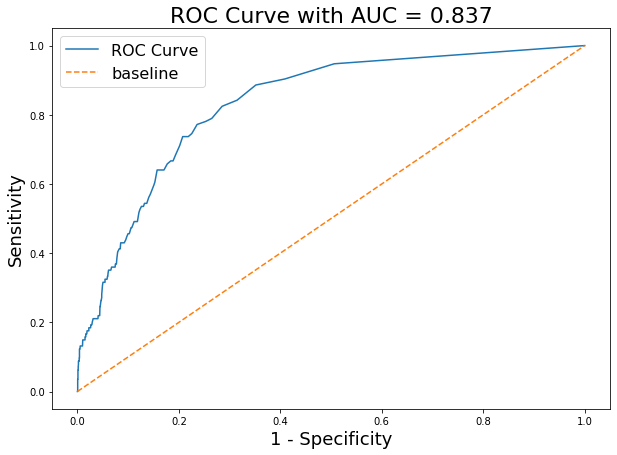

In [36]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", 
          fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

---
## Feature importance

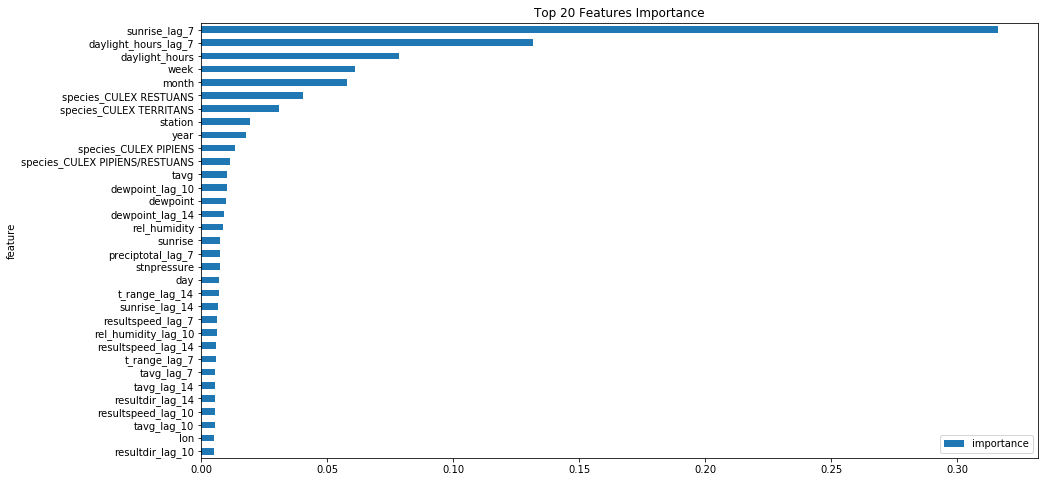

In [37]:
feature_importance = xgc.feature_importances_
threshold = 0.005

feat_impt_df = pd.DataFrame({'feature': X_train.columns, 
                         'importance': feature_importance}).sort_values(by = 'importance', ascending=True)
feat_impt_df = feat_impt_df[feat_impt_df['importance'] > threshold]

feat_impt_df.plot.barh('feature', 'importance', figsize = (15,8))
plt.title('Top 20 Features Importance');

---
## Recommendations

To answer the question of WHEN to implement aerial spraying, we look to feature importance. 

Based on the feature importance chart above, we can see that the top 10 
most important features are: 
1. Sunrise (7 days lag)
2. Month
3. Week
4. Daylight Hours
5. Species: CULEX RESTUANS
6. Daylight Hours(14 days lag)
7. Species: CULEX TERRTANS
8. Station
9. Daylight Hours(7 days lag)
10. Year

The feature with the highest feature importance is sunrise (7 days lag). This is aligned with our 3rd party research that peak mosquito hours includes sunrise and sunset. 
Other features suggest that warmer months seem to increase the probablity of the presence of NWV. 
The implementation of time lag features gave us insights to conduct aerial sprays between 1-2 weeks earlier, before the onset of warmer months. 
We also suggest for the DOPH to keep a closer eye on the species; CULEX RESTUANS and CULEX TERRTANS. 
humidity and precip conveys the same message that humid months leads to higher probabilties of WNV being present. 

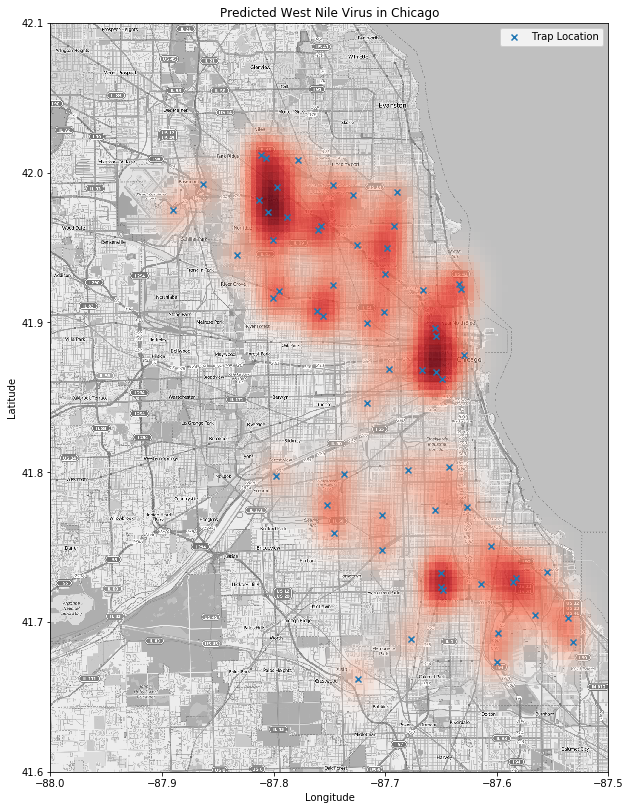

In [38]:
#create df with predictions and lat and lon
predict_loc = X_test.loc[:,['lat','lon','trap']]
predict_loc['wnv_pred'] = pred

#load map
mapdata = np.loadtxt("./assets/mapdata_copyright_openstreetmap_contributors.txt")
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

#Traps where only WNV is present
sightings = predict_loc[predict_loc['wnv_pred'] > 0.5]
sightings = sightings.groupby(['trap','lon', 'lat']).max()['wnv_pred'].reset_index()
V = sightings[['lon', 'lat']].values
kd = KernelDensity(bandwidth=0.015)
kd.fit(V)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

#kernel density
plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv, origin='lower', cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

#Trap locations
locations = sightings[['lon', 'lat']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x', label='Trap Location')

plt.title('Predicted West Nile Virus in Chicago')
plt.legend(frameon=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('predicted_heatmap.png')

#credit: https://github.com/vijayswamy89/WestNileVirusPredictionsInChicago/blob/master/WestNileVirusPredictions.ipynb

Our classifier has a 83% chance of accurately identifying WNV clusters. This will provide the DOPH with a fairly accurate picture of where to implement the vector control. The red spots are predicted areas with high concentrations of the WNV. 


---

## Cost Benefit Analysis

Background: There has been about 40,000 NWV cases in the USA and cost approximately USD800 million since 1999. This brings the average cost per case to USD20,000. Spraying costs ranges from USD500,000 to USD700,000 annually. Given the large economic impacts, it is natural to want to weigh the costs of spraying indescriminately over large areas against the effectiveness and economic benefits. 

According to CDC, "Aerial Spraying is the most effective way when a large area has to be treated". This will be the main form of vector control that we will be considering. 

Costs of the NWV: 
The NWV has historically had strong negative impact on the economy of states. The losses incurred include:
1. the cost of treatment
2. loss of income/productivity

For sacremento in 2005, this totaled to approximately USD2.3 million.  

Costs of treatment:
Some of the costs of applying pesticide over a large area include:
1. cost of pesticide
2. labour costs of applying pesticide

In the same time period in Sacremento, the vector control cost USD700,000.

Sacremento county has an area of 2574 sqkm and a population of 1.5 million while Chicago is about 606 sqkm and population of 2.706 million. This means that the population density of Sacremento is 583/sqkm and Chicago, 4455/sqkm, or approximately 7.5 times denser than sacremento. 

As seen in the case study of Sacremento, the material and labour costs of aerial spraying is far outweighed by the economic costs of treatment and productivity loss. Further taking into account the higher poulation density, it means that the costs of spraying will likely be lower while the economic costs of not spraying could go up. 

It is also important to note that the NWV can also be distinguished between the general case and the neuro-invasive case. In the neuro-invasive case, death and disability could result from this. 
The treatment costs of general cases are on average USD8,000 while the neuroinvasive case cost USD33,000 (excluding loss of income of USD10,000).
This means that it only takes the prevention of 15 neuroinvasive cases to breakeven on the cost of the spray. 

In light of these figure, we recommend for the DOPH of Chicago to proceed with aerial spraying, in line with the recommendations made above. 

In the long run, education is key in preventing the spread of the virus by ensuring that stagnant water is removed and to stay indoors outside of daylight hours, when mosquitoes are most active.

Moving forward, some next steps could include the addition of data on the bird population which also a known potential source of the Nile West Virus. 


source:
1. https://www.cdc.gov/westnile/vectorcontrol/aerial-spraying.html
2. https://medicine.yale.edu/news-article/2691/

---

## Conclusion

To conclude, we were asked to consult and generate insights on WHEN and WHERE, the Department of Public Health (DOPH) should conduct vector control to prevent the spread of the West Nile Virus (WNV). 

After data cleaning, EDA and feature engineering, we preprocessed our data by scaling and balancing our data. We then used cross validation to select the model. Once done, we tuned the hyperparameters to generate the best scores. Using the optimum parameters, we scored them on the training data, using a range of classification metrics including f1 accuracy score. Since false positive and false negatives were important to us, we chose the model with the highest ROC AUC score and scored our optimal model with the test data. Finally, our classifier achieved a test score of 0.834, which means that it correctly classified text data 83.4% of the time.

We then conducted cost benefit analysis on whether aerial spraying is a cost effective solution. We concluded that the economic costs of not spraying far outweighed the cost of the spray, especially in a city as dense as Chicago. 

Our recommendation, based on the model's predictions and feature importance, is that the vector control should be conducted at:
1. sunrise, where the mosquitos are most active
2. 1-2 weeks before the onset of warmer and dry months
3. to focus on areas/stations with high populations of CULEX RESTUANS and CULEX TERRTANS
4. areas predicted to have the WNV present, according to predictions map


With these, we will be able to provide better insights to the DOPH to help with their mission to reduce the spread of West Nile Virus. 

---

## Kaggle submission

In [39]:
#fitting model on whole train data 
xgc = XGBClassifier(gamma = 0.1, learning_rate = 0.1, max_depth = 7, n_estimators = 200, reg_alpha = 1)
xgc.fit(X, y)    #this is whole of train data

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
test_pred = [i[1] for i in xgc.predict_proba(test)]

In [47]:
sample = pd.read_csv('./assets/sampleSubmission.csv')

In [48]:
df = pd.DataFrame(sample['Id'])
df['WnvPresent'] = test_pred
df.set_index(['Id'], inplace = True)

In [49]:
#sanity checks 
display(df.shape)
df.head()

(116293, 1)

,WnvPresent
Id,
1,0.003841
2,0.001533
3,0.001399
4,0.001091
5,0.001398


In [ ]:
df.to_csv('./assets/data_clean/submit.csv')

In [ ]:
#kaggle score of 0.64425 it improved!!!